In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
edge_list = [
    ['A','B'],
    ['B','A'],
    ['C','A'],
    ['C','B'],
    ['C','D'],
    ['D','B'],
    ['E','A'],
    ['E','B'],
    ['E','D']
]

In [3]:
G = nx.DiGraph(edge_list)

In [4]:
nodes = list(G.nodes())
print(nodes)

['A', 'B', 'C', 'D', 'E']


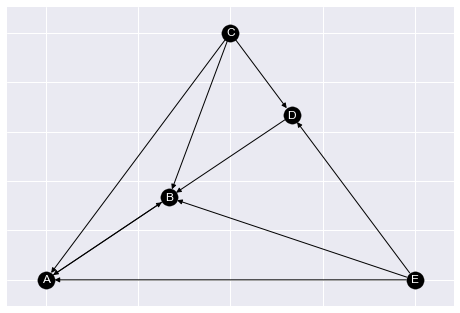

In [5]:
pos = nx.planar_layout(G)
nx.draw_networkx(G,pos,node_color='black',font_color='white')

## Structural equivalence 

Two vertices of a network are structurally equivalent if they share many of the same neighbors.

### Cosine similarity

A simple count of common neighbors for two vertices is not on its own a very good measure. One should know the degree of the vertices or how many common neighbors other pairs of vertices has. Cosine similarity takes into account these regards and also allow for varying degrees of vertices. Salton proposed that we regard the i-th and j-th rows/columns of the adjacency matrix as two vectors and use the cosine of the angle between them as a similarity measure. The cosine similarity of i and j is the number of common neighbors divided by the geometric mean of their degrees.

Its value lies in the range from 0 to 1. The value of 1 indicates that the two vertices have exactly the same neighbors while the value of zero means that they do not have any common neighbors. Cosine similarity is technically undefined if one or both of the nodes has zero degree, but according to the convention, we say that cosine similarity is 0 in these cases.

$N_{i}$ --> Neighbours  of vertex i

cosine(u,v) = $\frac{|N_{u} \cap N_{v}|}{\sqrt{|N_{u}|.|N_{v}|}}$

In [6]:
def cosineSimilarity(Nu,Nv):
    Nuv = np.intersect1d(Nu,Nv)
    return len(Nuv)/np.sqrt(len(Nu) * len(Nv))

In [7]:
# Calculating Cosine Similarity between every two vertex.
cosine_similarities = []

for i in range(len(nodes)):
    temp = []
    for j in range(len(nodes)):
        temp.append(cosineSimilarity(list(G.neighbors(nodes[i])),list(G.neighbors(nodes[j]))))
    cosine_similarities.append(temp)

In [8]:
cosine_similarities_df = pd.DataFrame(cosine_similarities,columns = nodes,index = nodes)

cosine_similarities_df

,A,B,C,D,E
A,1.00000,0.00000,0.57735,1.00000,0.57735
B,0.00000,1.00000,0.57735,0.00000,0.57735
C,0.57735,0.57735,1.00000,0.57735,1.00000
D,1.00000,0.00000,0.57735,1.00000,0.57735
E,0.57735,0.57735,1.00000,0.57735,1.00000


In [9]:
structurally_equivalent_nodes = []

for i in range(len(nodes)):
    for j in range(len(nodes)):
        if i < j and cosine_similarities[i][j] == 1.0:
            structurally_equivalent_nodes.append([nodes[i],nodes[j]])

print("Structurally Equivalent Nodes Are : ")
print(structurally_equivalent_nodes)

Structurally Equivalent Nodes Are : 
[['A', 'D'], ['C', 'E']]


In [10]:
print("Modularity of Graph : ")
print(nx.algorithms.community.quality.modularity(G,communities=nodes))

Modularity of Graph : 
-0.1111111111111111


In [11]:
communities = nx.algorithms.community.greedy_modularity_communities(G)
print("Communities : ")
print(communities)

Communities : 
[frozenset({'E', 'D', 'C'}), frozenset({'B', 'A'})]


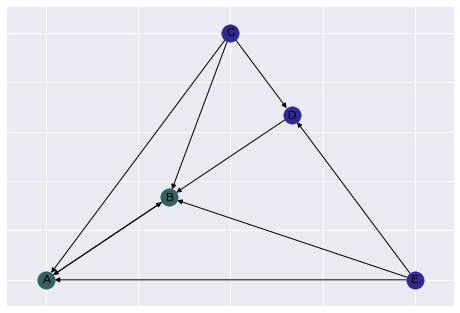

In [12]:
nx.draw_networkx(G,pos,edge_color='black')
for community in communities:
    r = np.random.randint(10,100)
    g = np.random.randint(10,100)
    b = np.random.randint(10,100)
    nx.draw_networkx_nodes(G,pos,nodelist=list(community),node_color='#' + str(r) + str(g) + str(b))